# Analysing Topical Shifts in Migration Publication via Title Words

The titles of publications on migration management give us an overview of what the scientific community focused in their research over the decades.

The dataset consists of authors, titles and publication year of articles published in the journal International Migration (IM) over the period 1961-2011. 



## Loading and inspecting the dataset

We start by loading the dataset in Pandas, which allows us to do basic analysis of the metadata.

In [232]:
import pandas as pd



In [231]:
# the name and location of the article records for the IM journal (in CSV format)
records_file = '../data/wiley-crawl-records.json'

# load the csv data into a data frame
df = pd.read_json(records_file)
# show the first and last records of the dataset to demonstrate what the records look like
df

,article_title,article_doi,article_author,article_page_range,article_pub_date,article_pub_year,journal,volume,issue,issue_title,issue_page_range,issue_pub_date,issue_pub_year
0,Community Services and Out-Migration,https://onlinelibrary.wiley.com/doi/10.1111/j....,Douglas S. Massey & Nathalie Williams & Willia...,1-41,26 April 2010,2010,International Migration,48,3,"International Migration: Vol 48, No 3",1-193,June 2010,2010
1,Europe's Migration Agreements with Migrant-Sen...,https://onlinelibrary.wiley.com/doi/10.1111/j....,Aderanti Adepoju & Femke Van Noorloos & Anneli...,42-75,26 April 2010,2010,International Migration,48,3,"International Migration: Vol 48, No 3",1-193,June 2010,2010
2,International Migration and Development in Asi...,https://onlinelibrary.wiley.com/doi/10.1111/j....,Maruja M.B. Asis & Nicola Piper & Parvati Ragh...,76-106,26 April 2010,2010,International Migration,48,3,"International Migration: Vol 48, No 3",1-193,June 2010,2010
3,Theoretical Considerations and Empirical Evide...,https://onlinelibrary.wiley.com/doi/10.1111/j....,Nicholas P. Glytsos,107-130,26 April 2010,2010,International Migration,48,3,"International Migration: Vol 48, No 3",1-193,June 2010,2010
4,"Causes, Challenges and Prospects of Brain Drai...",https://onlinelibrary.wiley.com/doi/10.1111/j....,Mussie Tessema,131-157,26 April 2010,2010,International Migration,48,3,"International Migration: Vol 48, No 3",1-193,June 2010,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1685,ECONOMIC AND SOCIAL REPERCUSSIONS OF SPANISH E...,https://onlinelibrary.wiley.com/doi/10.1111/j....,Luis A. Martinez Cachero,35-48,06 April 1962,1962,Migration,2,2,"Migration: Vol 2, No 2",3-92,April‐June 1962,1962
1686,HOW MIGRATION AFFECTS THE COUNTRY OF IMMIGRATION,https://onlinelibrary.wiley.com/doi/10.1111/j....,Francesco M. Dominedo,49-60,06 April 1962,1962,Migration,2,2,"Migration: Vol 2, No 2",3-92,April‐June 1962,1962
1687,Information,https://onlinelibrary.wiley.com/doi/10.1111/j....,None,61-80,06 April 1962,1962,Migration,2,2,"Migration: Vol 2, No 2",3-92,April‐June 1962,1962
1688,DOCUMENTATION,https://onlinelibrary.wiley.com/doi/10.1111/j....,None,81-90,06 April 1962,1962,Migration,2,2,"Migration: Vol 2, No 2",3-92,April‐June 1962,1962


### Basic summary statistics

A count of the values in the journal name column, reveals that the metadata of articles has some variation, but almost all use the canonical _International Migration_. In the early years, the journal was called _Migration_ but also _Migracion_ was used. Some contributed articles are written in Spanish or French.



In [234]:
df.journal.value_counts()

International Migration    1629
Migracion                    34
Migration                    27
Name: journal, dtype: int64

#### Authors

There are many different authors in the dataset. A value count reveals that some authors published multiple articles in IM, but the majority published only a single article. 

This should also be a warning that some values in the record may be **incorrect**, **incomplete** and/or **inconsistent**, so quantitative analysis should always be complemented with qualitative analysis.

In [235]:
df.article_author.value_counts()

Reginald Appleyard                         11
Aderanti Adepoju                            8
W. Dumon Editor                             8
Wilfried Dumon Editor                       7
Elzbieta M. Gozdziak & Charles B. Keely     6
                                           ..
M.M. Suarez-Orozco                          1
J. H. Burnley                               1
Comentario Critico De T. Cnossen            1
Hon. Alexander Cachia Zammit                1
R. Appleyard                                1
Name: article_author, Length: 1095, dtype: int64

These author names need normalisation to collapse variants like `BEYER, G.` and `Beyer, G.`.

In [236]:
df.article_author.str.lower().str.title().value_counts()

G. Beyer                 11
Reginald Appleyard       11
W. Dumon Editor           8
Aderanti Adepoju          8
Wilfried Dumon Editor     7
                         ..
M. V. George              1
S. K. Kuthiala Ph.D.      1
Gladys Nieto              1
Xiang Biao                1
Horst Entorf              1
Name: article_author, Length: 1058, dtype: int64

This reduces the number of distinct values from 1095 to 1058, so the impact is small, although Gunther Beyer is now among the most frequent author in the dataset.

In [238]:
df.article_author.str.lower().str.title().value_counts().value_counts()

1     952
2      73
3      17
4       6
6       4
11      2
8       2
7       1
5       1
Name: article_author, dtype: int64

There are 952 author names that appear only once, and only a handful authored 4 or more articles. 

#### Publication Years

Counting the number of articles per year reveals that some years had very few articles (e.g. 1979 has only 5), but most years have more than 10. The number of articles per year seems to increase over time. 

<AxesSubplot:xlabel='Issue year', ylabel='Number of articles'>

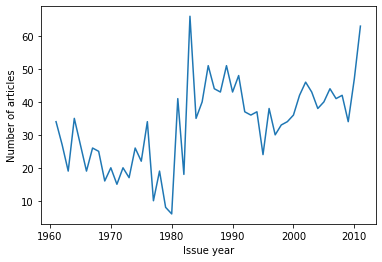

In [240]:
df.issue_pub_year.value_counts().sort_index().plot(xlabel='Issue year', ylabel='Number of articles')

In [243]:
counts = df.issue_pub_year.value_counts()
counts[counts > 50]

1983    66
2011    63
1989    51
1986    51
Name: issue_pub_year, dtype: int64

In some years, there are a high number of articles because each original article is published in three languages (English, French and Spanish), for instance Issue 2 in Volume 21 (from 1983). See [https://onlinelibrary.wiley.com/toc/14682435/1983/21/2](https://onlinelibrary.wiley.com/toc/14682435/1983/21/2).

#### Data Criticism: Evaluating Data Collection

We do a manual check of the dataset, to give an idea of how complete it is. The article metadata was downloaded from WorldCat, which contains records from tens of thousands of library holdings catalogues around the world. It is possible that some records are missing, and we can evaluate this by checking the number of records per year against the online catalogue of the journal's publisher, which in this case is Wiley. The [journal website](https://onlinelibrary.wiley.com/loi/14682435) lists articles by volume but offers no easy way to download all the records. 

In [197]:
df['lowercase_title'] = df.article_title.str.lower()
title_counts = df.lowercase_title.value_counts()

title_counts

book reviews                                                                                                                                                                                    46
books, periodicals, pamphlets, statistics                                                                                                                                                       45
note from the editor                                                                                                                                                                            36
introduction                                                                                                                                                                                    33
information                                                                                                                                                                                     30
                         

There are a lot of recurring titles that carry little topical content regarding the discourse on migration. The list of titles that occur more than once contains mostly titles that can be safely removed from the list, although some titles that occur twice should be kept.

In [198]:
title_counts[title_counts > 1]

book reviews                                                                                                                                46
books, periodicals, pamphlets, statistics                                                                                                   45
note from the editor                                                                                                                        36
introduction                                                                                                                                33
information                                                                                                                                 30
recent publications                                                                                                                         20
publications, periodicals, pamphlets, statistics                                                                                            16

Titles the occur more than twice are all labeled as `recurring_title`.

In [199]:
list(title_counts[title_counts > 2].index)

['book reviews',
 'books, periodicals, pamphlets, statistics',
 'note from the editor',
 'introduction',
 'information',
 'recent publications',
 'publications, periodicals, pamphlets, statistics',
 'editorial',
 'books received',
 'intergovernmental committee for migration comite intergouvernemental pour les migrations comite intergubernamental para las migraciones',
 'list of reviewers',
 'current trends and developments',
 'bibliography',
 'documentation',
 'index',
 'publications received',
 'international organization for migration',
 'participants']

In [200]:
recurring_titles = list(title_counts[title_counts > 2].index)

In [201]:
df['title_count'] = df.groupby(['lowercase_title'])['article_title'].transform('count')
df['recurring_title'] = df.title_count > 2
df.recurring_title
                                           

0       False
1       False
2       False
3       False
4       False
        ...  
1685    False
1686    False
1687     True
1688     True
1689     True
Name: recurring_title, Length: 1690, dtype: bool

In [202]:
df_filtered = df[df_crawl.recurring_title == False]
df_filtered

,article_title,article_doi,article_author,article_page_range,article_pub_date,article_pub_year,journal,volume,issue,issue_title,issue_page_range,issue_pub_date,issue_pub_year,lowercase_title,title_count,recurring_title
0,Community Services and Out-Migration,https://onlinelibrary.wiley.com/doi/10.1111/j....,Douglas S. Massey & Nathalie Williams & Willia...,1-41,26 April 2010,2010,International Migration,48,3,"International Migration: Vol 48, No 3",1-193,June 2010,2010,community services and out-migration,1,False
1,Europe's Migration Agreements with Migrant-Sen...,https://onlinelibrary.wiley.com/doi/10.1111/j....,Aderanti Adepoju & Femke Van Noorloos & Anneli...,42-75,26 April 2010,2010,International Migration,48,3,"International Migration: Vol 48, No 3",1-193,June 2010,2010,europe's migration agreements with migrant-sen...,1,False
2,International Migration and Development in Asi...,https://onlinelibrary.wiley.com/doi/10.1111/j....,Maruja M.B. Asis & Nicola Piper & Parvati Ragh...,76-106,26 April 2010,2010,International Migration,48,3,"International Migration: Vol 48, No 3",1-193,June 2010,2010,international migration and development in asi...,1,False
3,Theoretical Considerations and Empirical Evide...,https://onlinelibrary.wiley.com/doi/10.1111/j....,Nicholas P. Glytsos,107-130,26 April 2010,2010,International Migration,48,3,"International Migration: Vol 48, No 3",1-193,June 2010,2010,theoretical considerations and empirical evide...,1,False
4,"Causes, Challenges and Prospects of Brain Drai...",https://onlinelibrary.wiley.com/doi/10.1111/j....,Mussie Tessema,131-157,26 April 2010,2010,International Migration,48,3,"International Migration: Vol 48, No 3",1-193,June 2010,2010,"causes, challenges and prospects of brain drai...",1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1679,Ecological Succession and Asian Immigrants in ...,https://onlinelibrary.wiley.com/doi/10.1111/14...,Xiaowei Zang,109-125,16 December 2002,2002,International Migration,38,1,"International Migration: Vol 38, No 1",3-137,March 2000,2000,ecological succession and asian immigrants in ...,1,False
1683,THE FREE MOVEMENT OF WORKERS IN EEC COUNTRIES,https://onlinelibrary.wiley.com/doi/10.1111/j....,,3-20,06 April 1962,1962,Migration,2,2,"Migration: Vol 2, No 2",3-92,April‐June 1962,1962,the free movement of workers in eec countries,1,False
1684,"OVERSEAS MIGRATION TO AND FROM AUSTRALIA, 1947...",https://onlinelibrary.wiley.com/doi/10.1111/j....,Charles A. Price M. A.;Ph.D.,21-34,06 April 1962,1962,Migration,2,2,"Migration: Vol 2, No 2",3-92,April‐June 1962,1962,"overseas migration to and from australia, 1947...",1,False
1685,ECONOMIC AND SOCIAL REPERCUSSIONS OF SPANISH E...,https://onlinelibrary.wiley.com/doi/10.1111/j....,Luis A. Martinez Cachero,35-48,06 April 1962,1962,Migration,2,2,"Migration: Vol 2, No 2",3-92,April‐June 1962,1962,economic and social repercussions of spanish e...,1,False


<AxesSubplot:>

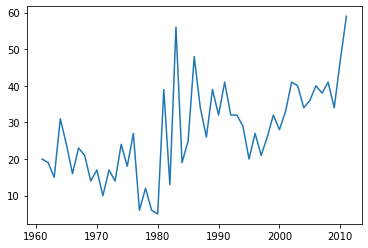

In [203]:
df_filtered.issue_pub_year.value_counts().sort_index().plot()

There are a few years with very low numbers of articles, namely the years 1977, 1979, 1980. Listing the articles of those years reveals that each year had only one or two short issues. This could be a signal that there is a mistake in the data extraction process, or that these were just unusual years.

In [204]:
df_filtered[df_filtered.issue_pub_year.isin([1977, 1979, 1980])].sort_values(by='issue_pub_year')

,article_title,article_doi,article_author,article_page_range,article_pub_date,article_pub_year,journal,volume,issue,issue_title,issue_page_range,issue_pub_date,issue_pub_year,lowercase_title,title_count,recurring_title
675,Human Rights and the Brain Drain,https://onlinelibrary.wiley.com/doi/10.1111/j....,N.K. ONUOHA CHUKUNTA,281-287,01 October 1977,1977,International Migration,15,4,"International Migration: Vol 15, No 4",281-318,October 1977,1977,human rights and the brain drain,1,False
1317,Brain drain Issue and Indicators on Brain-Drain,https://onlinelibrary.wiley.com/doi/10.1111/j....,AMALENDU GUHA,3-20,01 January 1977,1977,International Migration,15,1,"International Migration: Vol 15, No 1",3-50,January 1977,1977,brain drain issue and indicators on brain-drain,1,False
1318,Australia's Immigration Programme: an Evaluati...,https://onlinelibrary.wiley.com/doi/10.1111/j....,MICHAEL T. SKULLEY,21-34,01 January 1977,1977,International Migration,15,1,"International Migration: Vol 15, No 1",3-50,January 1977,1977,australia's immigration programme: an evaluati...,1,False
1319,Circular Migration in Venezuelan Frontier Areas,https://onlinelibrary.wiley.com/doi/10.1111/j....,MARY ELLEN CONAWAY,35-42,01 January 1977,1977,International Migration,15,1,"International Migration: Vol 15, No 1",3-50,January 1977,1977,circular migration in venezuelan frontier areas,1,False
677,Some Current Topics of Labour Migration in Eur...,https://onlinelibrary.wiley.com/doi/10.1111/j....,HEINZ WERNER,300-307,01 October 1977,1977,International Migration,15,4,"International Migration: Vol 15, No 4",281-318,October 1977,1977,some current topics of labour migration in eur...,1,False
676,Immigrants in Transition: The Israeli Absorpti...,https://onlinelibrary.wiley.com/doi/10.1111/j....,RUTH TAMAR HOROWITZ,288-299,01 October 1977,1977,International Migration,15,4,"International Migration: Vol 15, No 4",281-318,October 1977,1977,immigrants in transition: the israeli absorpti...,1,False
796,Conclusions and Recommendations/Conclusions et...,https://onlinelibrary.wiley.com/doi/10.1111/j....,None,21-56,04 January 1979,1979,International Migration,17,1-2,"International Migration: Vol 17, No 1‐2",7-263,January‐April 1979,1979,conclusions and recommendations/conclusions et...,2,False
797,Expert Papers/Communications des Experts/Estud...,https://onlinelibrary.wiley.com/doi/10.1111/j....,DR. W. DUMON,59-161,04 January 1979,1979,International Migration,17,1-2,"International Migration: Vol 17, No 1‐2",7-263,January‐April 1979,1979,expert papers/communications des experts/estud...,1,False
798,Conclusions and Recommendations/Conclusions et...,https://onlinelibrary.wiley.com/doi/10.1111/j....,None,165-247,04 January 1979,1979,International Migration,17,1-2,"International Migration: Vol 17, No 1‐2",7-263,January‐April 1979,1979,conclusions and recommendations/conclusions et...,2,False
799,Information Papers: Documents d'Information: D...,https://onlinelibrary.wiley.com/doi/10.1111/j....,None,249-253,04 January 1979,1979,International Migration,17,1-2,"International Migration: Vol 17, No 1‐2",7-263,January‐April 1979,1979,information papers: documents d'information: d...,1,False


Checking the issues for these years on the journal website reveals that these are the only issues available, so there is no mistakes in the extraction process. The fact that only issues 1 and 4 for 1977 are present does suggest that Wiley is missing two issues.

In [230]:
df[pd.isnull(df.article_author) == False]

,article_title,article_doi,article_author,article_page_range,article_pub_date,article_pub_year,journal,volume,issue,issue_title,issue_page_range,issue_pub_date,issue_pub_year,lowercase_title,title_count,recurring_title,normalised_title,issue_decade
0,Community Services and Out-Migration,https://onlinelibrary.wiley.com/doi/10.1111/j....,Douglas S. Massey & Nathalie Williams & Willia...,1-41,26 April 2010,2010,International Migration,48,3,"International Migration: Vol 48, No 3",1-193,June 2010,2010,community services and out-migration,1,False,community services and out-migration,2010
1,Europe's Migration Agreements with Migrant-Sen...,https://onlinelibrary.wiley.com/doi/10.1111/j....,Aderanti Adepoju & Femke Van Noorloos & Anneli...,42-75,26 April 2010,2010,International Migration,48,3,"International Migration: Vol 48, No 3",1-193,June 2010,2010,europe's migration agreements with migrant-sen...,1,False,europes migration agreements with migrant-send...,2010
2,International Migration and Development in Asi...,https://onlinelibrary.wiley.com/doi/10.1111/j....,Maruja M.B. Asis & Nicola Piper & Parvati Ragh...,76-106,26 April 2010,2010,International Migration,48,3,"International Migration: Vol 48, No 3",1-193,June 2010,2010,international migration and development in asi...,1,False,international migration and development in asi...,2010
3,Theoretical Considerations and Empirical Evide...,https://onlinelibrary.wiley.com/doi/10.1111/j....,Nicholas P. Glytsos,107-130,26 April 2010,2010,International Migration,48,3,"International Migration: Vol 48, No 3",1-193,June 2010,2010,theoretical considerations and empirical evide...,1,False,theoretical considerations and empirical evide...,2010
4,"Causes, Challenges and Prospects of Brain Drai...",https://onlinelibrary.wiley.com/doi/10.1111/j....,Mussie Tessema,131-157,26 April 2010,2010,International Migration,48,3,"International Migration: Vol 48, No 3",1-193,June 2010,2010,"causes, challenges and prospects of brain drai...",1,False,causes challenges and prospects of brain drain...,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1679,Ecological Succession and Asian Immigrants in ...,https://onlinelibrary.wiley.com/doi/10.1111/14...,Xiaowei Zang,109-125,16 December 2002,2002,International Migration,38,1,"International Migration: Vol 38, No 1",3-137,March 2000,2000,ecological succession and asian immigrants in ...,1,False,ecological succession and asian immigrants in ...,2000
1683,THE FREE MOVEMENT OF WORKERS IN EEC COUNTRIES,https://onlinelibrary.wiley.com/doi/10.1111/j....,,3-20,06 April 1962,1962,Migration,2,2,"Migration: Vol 2, No 2",3-92,April‐June 1962,1962,the free movement of workers in eec countries,1,False,the free movement of workers in eec countries,1960
1684,"OVERSEAS MIGRATION TO AND FROM AUSTRALIA, 1947...",https://onlinelibrary.wiley.com/doi/10.1111/j....,Charles A. Price M. A.;Ph.D.,21-34,06 April 1962,1962,Migration,2,2,"Migration: Vol 2, No 2",3-92,April‐June 1962,1962,"overseas migration to and from australia, 1947...",1,False,overseas migration to and from australia 19471961,1960
1685,ECONOMIC AND SOCIAL REPERCUSSIONS OF SPANISH E...,https://onlinelibrary.wiley.com/doi/10.1111/j....,Luis A. Martinez Cachero,35-48,06 April 1962,1962,Migration,2,2,"Migration: Vol 2, No 2",3-92,April‐June 1962,1962,economic and social repercussions of spanish e...,1,False,economic and social repercussions of spanish e...,1960


## Analysing the Article Titles

To analyse the topics of discourse, we use the article titles. To do a content analysis, some data transformations are needed:

- standardising the use of upper and lowercase characters,
- removing common stopwords, as they convey nothing about the topics discussed
- counting individual words and sequences of words as a quantitative signal for the attention to different topics.

We look specifically at:

- word unigram frequencies: how often individual words occur across titles
- word bigram frequencies: how often combinations of two words occur across titles.

To demonstrate the need for the transformations described above, we look at the first 20 titles.

In [205]:
# Get a list of all the titles
titles = list(df_filtered.article_title)

# show the first 20 titles
titles[:20]



['Community Services and Out-Migration',
 "Europe's Migration Agreements with Migrant-Sending Countries in the Global South: A Critical Review",
 'International Migration and Development in Asia: Exploring Knowledge Frameworks',
 "Theoretical Considerations and Empirical Evidence on Brain Drain Grounding the Review of Albania's and Bulgaria's Experience 1",
 'Causes, Challenges and Prospects of Brain Drain: The Case of Eritrea',
 'A Desire to Return to the Country of Birth as a Function of Language Preference: An Empirical Study with Iranian Immigrants in the United States',
 'Religious Status and Drug-use Behaviour among Former Soviet Union Immigrants',
 '“Reconsidering the Study of International Migration: A Way Forward for Macrostructural Migration Research”',
 'The New U.S.A. Immigration Law',
 'Public Law 89–236 89th congress, H. R. 2580 October 3, 1986 An Act',
 "Scope for Latin America: ICEM'S CONTRIBUTION TO FURTHER ECONOMIC DEVELOPMENT",
 "UN PROJET D'AVENIR POUR L'AMÉRIQUE LA

#### Inconsistent Case

The titles differ in their use of upper and lower case, so one step is to normalise all titles to be lower case. 

One consequence of this is that meaningful differences between a word with an initial uppercase that is part of a name (like _Migration_ in the organisation name _Internationl Committee for European Migration_) is merged with the regular noun _migration_. But in most cases this is not a problem, as they represent the same concept. Moreover, titles of journal article tend to use title casing of all words in the title, or at least all content-bearing words (i.e. non-stopwords). So it is difficult to make this distinction with algorithmic processing anyway.

#### Missing titles

Another thing we note is that the last value in the list is `nan`, which stands for `Not a Number` and is Pandas' way of warning us that there is no value for the row in the dataset. What it means for us is that there is an entry that has no title. For now we will skip these missing titles in the word cloud analysis.

But first let us see how prevalent they are. If a significant fraction of articles have no title, the title word analysis might not be a good reflection of the actual frequencies of title words.


In [206]:
missing_titles = [title for title in titles if not isinstance(title, str)]
print('Total number of article titles:', len(titles))
print('Number of missing article titles:', len(missing_titles))


Total number of article titles: 1401
Number of missing article titles: 0


Only two out of 1146 titles are missing, which will have a negligible affect on the analysis.

In [207]:
# we remove the missing titles and continue the analysis with the 1144 remaining actual titles.
titles = [title for title in titles if isinstance(title, str)]

len(titles)

1401

### Word Frequency Lists

We start with a quick look at individual word frequencies for the first 20 titles to get an insight in some easy that need preprossing.

In [208]:
from collections import Counter # import to count word frequencies


# count frequencies of individual words
uni_freq = Counter()

for title in titles[:20]:
    # .lower() transform all characters to lower case
    # .split(' ') splits the title into chunks wherever there is a whitespace
    terms = title.lower().split(' ')
    uni_freq.update(terms)

# Show the 25 most common words and their frequencies
for term, freq in uni_freq.most_common(25):
    print(f'{term: <30}{freq: >5}')

the                              16
of                               12
and                               7
migration                         6
to                                5
in                                4
a                                 4
for                               4
development                       3
country                           3
language                          3
an                                3
new                               3
with                              2
review                            2
international                     2
empirical                         2
brain                             2
as                                2
study                             2
immigrants                        2
religious                         2
immigration                       2
law                               2
icem                              2


Our first attempt is to simply split the title on whitespaces, but that leaves punctuation as part of words, e.g. `“Mater`.

The next preprocessing step is removing punctuation from the titles.

In [209]:
from collections import Counter # import to count word frequencies
import re # import to remove punctuation

# count frequencies of individual words
uni_freq = Counter()

for title in titles[:20]:
    # replace punctuation with nothing (i.e. remove from the word)
    title = re.sub(r'[^A-Za-z0-9 -]', '', title)
    # transform characters to lowercase
    clean_title = title.lower()
    # split the transformed string on whitespace
    terms = clean_title.split(' ')
    uni_freq.update(terms)

for term, freq in uni_freq.most_common(25):
    print(f'{term: <30}{freq: >5}')
    



the                              16
of                               12
and                               7
migration                         7
to                                5
in                                4
a                                 4
for                               4
development                       3
country                           3
language                          3
an                                3
new                               3
with                              2
review                            2
international                     2
empirical                         2
brain                             2
drain                             2
as                                2
study                             2
immigrants                        2
religious                         2
immigration                       2
law                               2


#### Stopwords and Content Words

Now we notice that the most frequent words are stopwords. We can use a standard stopword list provided by [NLTK](http://www.nltk.org) to remove those from the frequency lists to focus on the content words.

In [210]:
from collections import Counter # import to count word frequencies
import re # import to remove punctuation
from nltk.corpus import stopwords # import to remove stopwords

stopwords_en = stopwords.words('english')
stopwords_fr = stopwords.words('french')
stopwords_sp = stopwords.words('spanish')
stopwords_all = stopwords_en + stopwords_fr + stopwords_sp

print('The first 10 English stopwords:', stopwords_en[:10])
print('The first 10 French stopwords:', stopwords_fr[:10])
print('The first 10 Spanish stopwords:', stopwords_sp[:10])
print('\nTotal number of distinct stopwords:', len(stopwords_all))

The first 10 English stopwords: ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your']
The first 10 French stopwords: ['au', 'aux', 'avec', 'ce', 'ces', 'dans', 'de', 'des', 'du', 'elle']
The first 10 Spanish stopwords: ['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se']

Total number of distinct stopwords: 621


In [211]:
# count frequencies of individual words
uni_freq = Counter()

for title in titles[:20]:
    # replace punctuation with nothing (i.e. remove from the word)
    title = re.sub(r'[^A-Za-z0-9 -]', '', title)
    # transform characters to lowercase
    clean_title = title.lower()
    # split the transformed string on whitespace
    terms = clean_title.split(' ')
    # remove stopwords
    terms = [term for term in terms if term not in stopwords_all and term != '']
    uni_freq.update(terms)

for term, freq in uni_freq.most_common(25):
    print(f'{term: <30}{freq: >5}')
    



migration                         7
development                       3
country                           3
language                          3
new                               3
review                            2
international                     2
empirical                         2
brain                             2
drain                             2
study                             2
immigrants                        2
religious                         2
immigration                       2
law                               2
migrants                          2
icem                              2
community                         1
services                          1
out-migration                     1
europes                           1
agreements                        1
migrant-sending                   1
countries                         1
global                            1


Now we have a list of mostly content words. Note that the stopwords list contains English stopwords, so common stopwords in other languages are not filtered out. We assume these are not very common so will leave them in for now. 

Now we repeat the the frequency counting for all 1144 titles, instead of the first 20.

In [212]:
# count frequencies of individual words
uni_freq = Counter()

for title in titles:
    # replace punctuation with nothing (i.e. remove from the word)
    title = re.sub(r'[^A-Za-z0-9 -]', '', title)
    # transform characters to lowercase
    clean_title = title.lower()
    # split the transformed string on whitespace
    terms = clean_title.split(' ')
    # remove stopwords
    terms = [term for term in terms if term not in stopwords_all and term != '']
    uni_freq.update(terms)

for term, freq in uni_freq.most_common(25):
    print(f'{term: <30}{freq: >5}')
    



migration                       401
immigrants                      115
migrants                        113
international                   101
immigration                      88
labour                           77
migrant                          74
case                             71
new                              63
australia                        63
policy                           60
social                           60
countries                        59
united                           58
immigrant                        56
emigration                       54
return                           53
refugees                         53
workers                          53
states                           52
economic                         51
women                            51
study                            45
integration                      45
development                      44


#### Word Bigrams

Next, we look at combinations of two words. Individual words can have quite different meanings in different contexts. Two neighbouring words in a title tend to contextualise each other, so convey more meaning.

In [213]:
# count frequencies of individual words
bi_freq = Counter()

for title in titles:
    # First, transform characters to lowercase
    clean_title = re.sub(r'[^A-Za-z0-9 -]', '', title.lower())
    # split the transformed string on whitespace
    terms = clean_title.split(' ')
    # replace punctuation with nothing (i.e. remove from the word)
    terms = [re.sub(r'\W', '', term) for term in terms]
    # get all pairs of subsequent title words
    bigrams = list(zip(terms[:-1], terms[1:]))
    # remove all bigrams for which the first or second word is a stopword
    bigram_terms = [' '.join(bigram) for bigram in bigrams if bigram[0] not in stopwords_all and bigram[1] not in stopwords_all]
    # count the occurrence of each bigram
    bi_freq.update(bigram_terms)


for term, freq in bi_freq.most_common(25):
    print(f'{term: <30}{freq: >5}')
    



international migration          58
united states                    47
labour market                    21
labour migration                 20
case study                       19
migrant women                    19
migrant workers                  18
brain drain                      17
emigration dynamics              17
return migration                 16
immigration policy               14
developing countries             13
human trafficking                13
latin america                    10
middle east                      10
new zealand                      10
latin american                   10
former soviet                     9
foreign workers                   9
migration policy                  9
soviet union                      8
european migration                8
hong kong                         8
federal republic                  8
among immigrants                  8


Now, 'international migration' is the most common two-word combination, followed by 'United States', 'labour migration', 'brain drain' and 'case study'.

### Analysing Title Words Per Decade

The articles are published over a period of several decades, and there might be shifts in the discourse over time. A next step is to group uni-grams and bi-grams per decade, to visualise shifts.

In [223]:
def make_title_unigram_term_list(title: str, stopwords):
    # First, transform characters to lowercase
    clean_title = title.lower()
    # split the transformed string on whitespace
    terms = clean_title.split(' ')
    # replace punctuation with nothing (i.e. remove from the word)
    terms = [re.sub(r'[^A-Za-z0-9 -]', '', term) for term in terms]
    # remove stopwords
    terms = [term for term in terms if term not in stopwords]
    return terms


def make_title_bigram_term_list(title: str, stopwords):
    # first turn the title into a list of normalised words
    terms = make_title_unigram_term_list(title, stopwords)
    # get all pairs of subsequent title words
    bigrams = list(zip(terms[:-1], terms[1:]))
    # remove all bigrams for which the first or second word is a stopword
    bigram_terms = [' '.join(bigram) for bigram in bigrams 
                    if bigram[0] not in stopwords and bigram[1] not in stopwords]
    return bigram_terms


def normalise_title(title: str):
    if not isinstance(title, str):
        return title
    terms = make_title_unigram_term_list(title, [])
    normalised_title = ' '.join(terms)
    return normalised_title


# Add the normalised title as extra column to the data frame
df['normalised_title'] = df.article_title.apply(normalise_title)

# Recreate the filtered view of the data with the new column
df_filtered = df[df_crawl.recurring_title == False]

df.normalised_title

0                    community services and out-migration
1       europes migration agreements with migrant-send...
2       international migration and development in asi...
3       theoretical considerations and empirical evide...
4       causes challenges and prospects of brain drain...
                              ...                        
1685    economic and social repercussions of spanish e...
1686     how migration affects the country of immigration
1687                                          information
1688                                        documentation
1689                                         bibliography
Name: normalised_title, Length: 1690, dtype: object

In [224]:
df['issue_decade'] = df.issue_pub_year.apply(lambda x: int(x/10) * 10 if not pd.isnull(x) else x)
df[['issue_pub_year', 'issue_decade']]



,issue_pub_year,issue_decade
0,2010,2010
1,2010,2010
2,2010,2010
3,2010,2010
4,2010,2010
...,...,...
1685,1962,1960
1686,1962,1960
1687,1962,1960
1688,1962,1960


The number of articles per decade:

In [225]:
df.issue_decade.value_counts().sort_index()

1960    228
1970    191
1980    395
1990    360
2000    406
2010    110
Name: issue_decade, dtype: int64

In [226]:
decades = sorted([int(decade) for decade in list(set(df.issue_decade)) if not pd.isnull(decade)])
decades

[1960, 1970, 1980, 1990, 2000, 2010]

In [227]:
from nltk.corpus import stopwords


for decade in decades:
    titles = list(df_filtered[df_filtered.issue_decade == decade].normalised_title)
    unigram_terms = [term for title in titles for term in make_title_unigram_term_list(title, stopwords_all)]
    unigram_freq = Counter(unigram_terms)
    print(decade)
    print('--------------------------')
    for term, freq in unigram_freq.most_common(25):
        print(f'{term: <30}{freq: >5}')
    print('\n\n')
    



1960
--------------------------
migration                        40
immigration                      17
emigration                       13
australia                        13
international                    12
america                          11
immigrants                       11
european                         11
development                      10
latin                             8
australian                        8
economic                          7
aspects                           7
assimilation                      7
social                            7
new                               6
icem                              6
country                           6
integration                       6
immigrant                         6
report                            6
europe                            6
                                  6
countries                         6
latine                            5



1970
--------------------------
migration                        

In [228]:
from nltk.corpus import stopwords


for decade in decades:
    titles = list(df_filtered[df_filtered.issue_decade == decade].normalised_title)
    bigram_terms = [term for title in titles for term in make_title_bigram_term_list(title, stopwords_all)]
    bigram_freq = Counter(bigram_terms)
    print(decade)
    print('--------------------------')
    for term, freq in bigram_freq.most_common(25):
        print(f'{term: <30}{freq: >5}')
    print('\n\n')
    



1960
--------------------------
latin america                     8
italian emigration                4
european migration                4
international migration           4
immigrants australia              3
intergovernmental committee       3
committee european                3
amrique latine                    3
united states                     3
brain drain                       3
western australia                 3
present day                       2
migration affects                 2
affects country                   2
assimilation immigrant            2
recent publications               2
assimilation immigrants           2
movement workers                  2
report intergovernmental          2
migration year                    2
migration australia               2
immigrants returning              2
selective migration               2
rural settlement                  2
selected bibliography             2



1970
--------------------------
united states                    